In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer

from sklearn.ensemble import RandomForestRegressor

from support_functions import *

In [11]:
#Import data and give column names

train = pd.read_csv('../../data/feature_selected_train_FD001.csv', sep=',', header=0, engine='python')
test = pd.read_csv('../../data/feature_selected_test_FD001.csv', sep=',', header=0, engine='python')
y_test = pd.read_csv('../../data/RUL_FD001.csv', sep=',', header=0,  engine='python')

index_names = train.columns[[0, 1]]
setting_names = train.columns[[2]]
sensor_names = train.drop(index_names.union(setting_names), axis = 1).columns # Find something better than union!!
scale_columns = sensor_names
keep_columns = scale_columns.union(index_names[[1]])

In [12]:
x_train = add_remaining_useful_life(train)
y_train = x_train.pop('RUL')
x_test = test.groupby(by="unit_no").last().reset_index()
x_train_scaled, x_test_scaled = scale_data(x_train, x_test, scale_columns)

In [13]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [14]:
if False:
    reg_grid = tree.DecisionTreeRegressor()
    svm_grid = GridSearchCV(reg_grid, parameters, 
                            scoring = make_scorer(mean_squared_error, greater_is_better = False), 
                            verbose = 10).fit(x_train_scaled, y_train)
    svm_grid.best_params_

In [15]:
reg = RandomForestRegressor(n_estimators=100, max_features="sqrt", random_state=0,
                           min_samples_leaf=11, min_impurity_decrease=0.0, 
                           max_depth=15, ccp_alpha=0.125)
reg.fit(x_train_scaled, y_train)
y_hat_train = reg.predict(x_train_scaled)
evaluate(y_train, y_hat_train, 'Train')

y_hat_test = reg.predict(x_test_scaled)
evaluate(y_test, y_hat_test, 'Test')

Train set RMSE:25.44657812868412, R2:0.8635162119566338
Test set RMSE:25.381584304690122, R2:0.6269406666165807


(25.381584304690122, 0.6269406666165807)

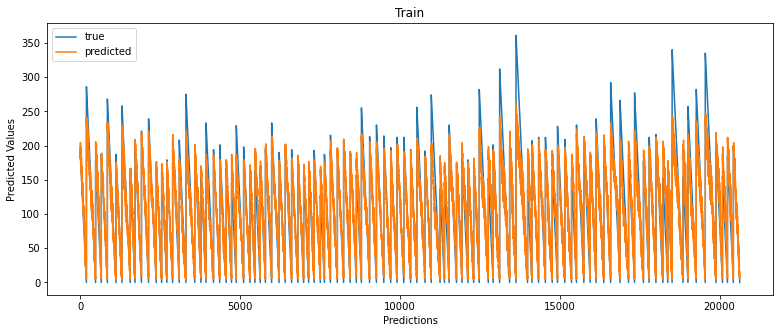

In [16]:
plot_predictions(y_train, y_hat_train)

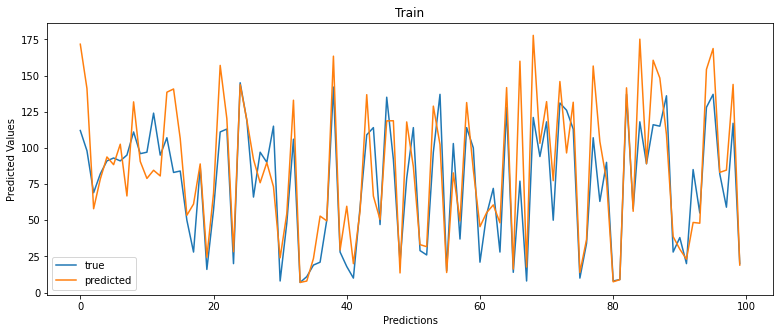

In [17]:
plot_predictions(y_test, y_hat_test)